In [122]:
#importing the libraries
import matplotlib.pyplot as plt    
import seaborn as sns

In [123]:
#import pandas
import pandas as pd
data1 = pd.read_csv('pokedex_(Update.04.20).csv')
data2 = pd.read_csv('pokedex_(Update_05.20).csv')
#merge the datasets
merge_data = pd.merge(data1, data2)
merge_data.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,0,0,0,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Normal
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,0,0,0,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Normal
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Normal
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,Normal
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,0,0,0,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,Normal


In [124]:
def setplt(x = 15, y = 9):
    f, ax = plt.subplots(figsize=(x, y))
    sns.despine(f, left=True, bottom=True)

In [125]:
merge_data['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [126]:
merge_data['type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel',
       'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [127]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1026 non-null   int64  
 1   pokedex_number    1026 non-null   int64  
 2   name              1026 non-null   object 
 3   german_name       936 non-null    object 
 4   japanese_name     936 non-null    object 
 5   generation        1026 non-null   int64  
 6   is_sub_legendary  1026 non-null   int64  
 7   is_legendary      1026 non-null   int64  
 8   is_mythical       1026 non-null   int64  
 9   species           1026 non-null   object 
 10  type_number       1026 non-null   int64  
 11  type_1            1026 non-null   object 
 12  type_2            540 non-null    object 
 13  height_m          1026 non-null   float64
 14  weight_kg         1025 non-null   float64
 15  abilities_number  1026 non-null   int64  
 16  ability_1         1023 non-null   object 


**Q1. What is the Count of Pokemon according to Generation ?**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


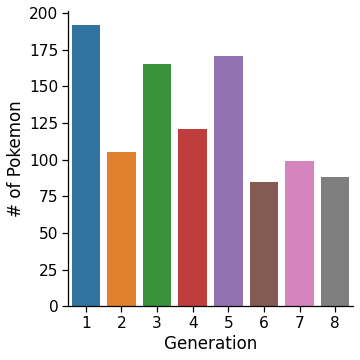

In [130]:
sns.set_context('notebook', font_scale=1.4)
sns.factorplot(
    x='generation', 
    data=merge_data, 
    kind='count'
).set_axis_labels('Generation', '# of Pokemon');

**Q2. What is the Count of Pokemon according to the Types (Primary and Secondary) ?**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


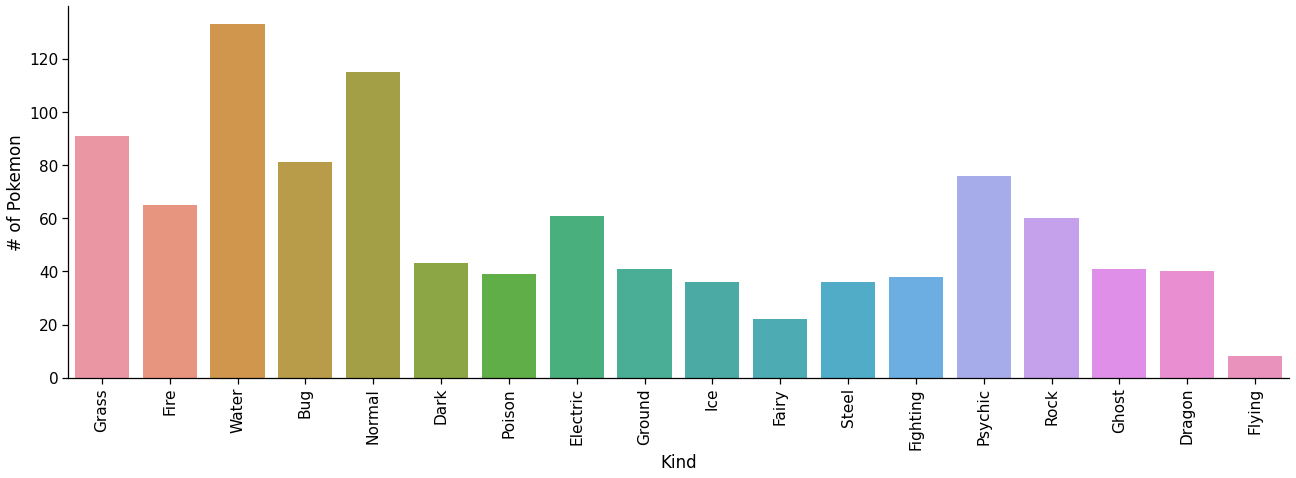

In [131]:
sns.factorplot(
x='type_1',
data=merge_data,
#col='type_1',
kind='count',
    size = 6,
    aspect = 3
    #col_wrap=10
).set_axis_labels('Kind', '# of Pokemon').set_xticklabels(rotation=90);

**Q3. What is the Corelation between the Strengths and Weaknesses of the Pokemon with respect to the type?`**

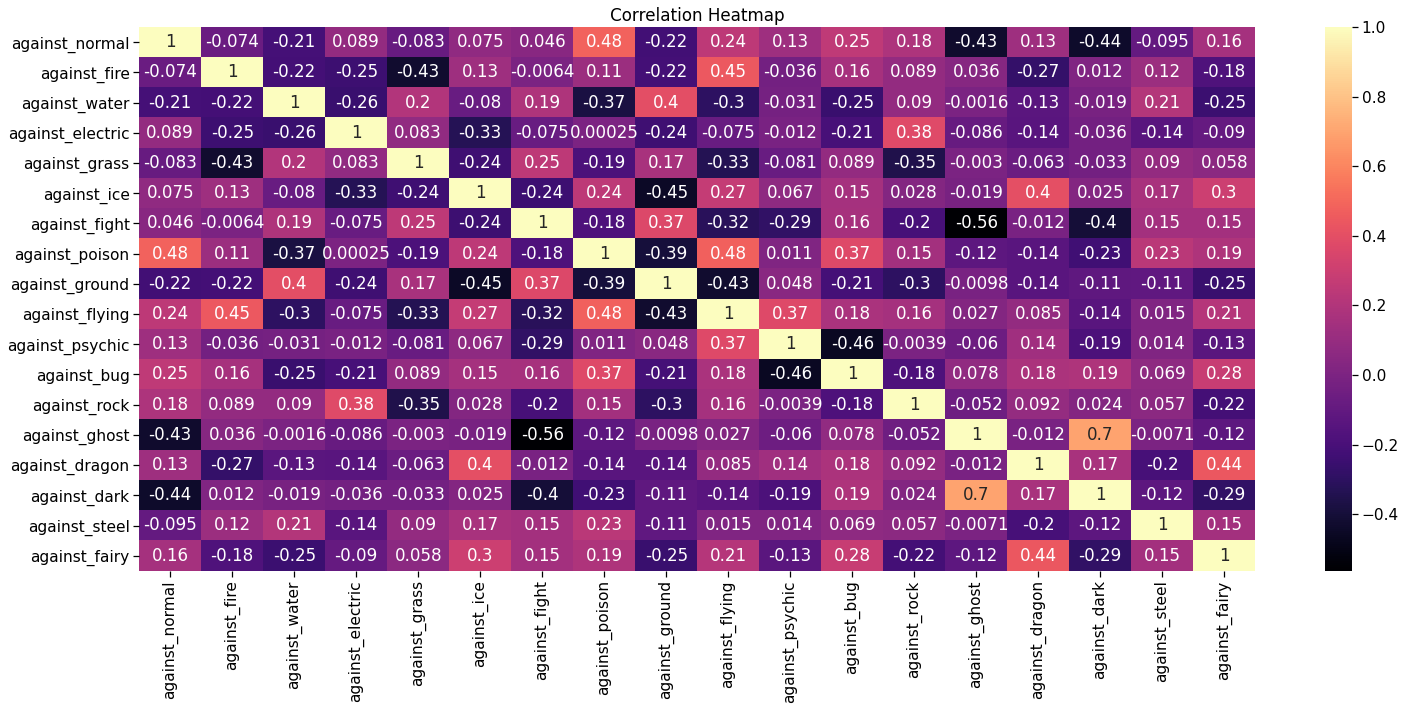

In [168]:
ag = merge_data[['against_normal','against_fire','against_water','against_electric','against_grass',
'against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic',
'against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']]
# Correlation heat map analysis
plt.subplots(figsize=(25,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = ag.corr()
sns.heatmap(corr, annot=True, cmap='magma',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Q4. How many Type_1 & Type_2 Pokemons are there?**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update

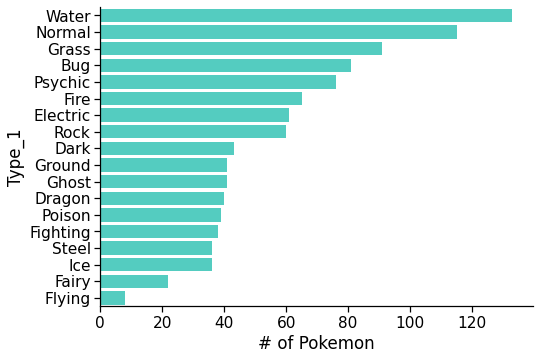

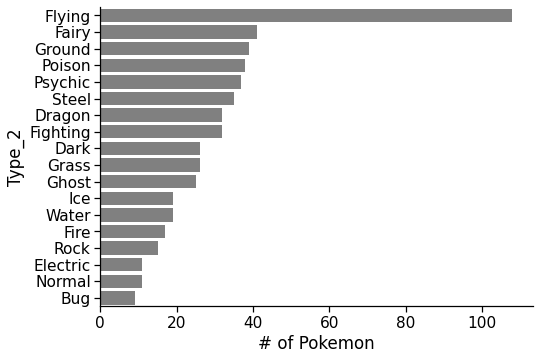

In [135]:
sns.factorplot(
    y='type_1',
    data=merge_data,
    kind='count',
    order=merge_data['type_1'].value_counts().index,
    aspect=1.5,
    size=5,
    color='turquoise'
).set_axis_labels('# of Pokemon', 'Type_1')

sns.factorplot(
    y='type_2',
    data=merge_data,
    kind='count',
    order=merge_data['type_2'].value_counts().index,
    aspect=1.5,
    size=5,
    color='grey'
).set_axis_labels('# of Pokemon', 'Type_2');

In [136]:
data0 = merge_data.set_index(["type_1", "type_2"])
data0.head(15)

Unnamed: 0  pokedex_number  ... against_fairy  status
type_1 type_2                              ...                      
Grass  Poison           0               1  ...           0.5  Normal
       Poison           1               2  ...           0.5  Normal
       Poison           2               3  ...           0.5  Normal
       Poison           3               3  ...           0.5  Normal
Fire   NaN              4               4  ...           0.5  Normal
       NaN              5               5  ...           0.5  Normal
       Flying           6               6  ...           0.5  Normal
       Dragon           7               6  ...           1.0  Normal
       Flying           8               6  ...           0.5  Normal
Water  NaN              9               7  ...           1.0  Normal
       NaN             10               8  ...           1.0  Normal
       NaN             11               9  ...           1.0  Normal
       NaN             12               9  ...           1.0  Normal
Bug    NaN             13              10  ...           1.0  Normal
       NaN             14              11  ...           1.0  Normal

[15 rows x 52 columns]

In [137]:
merge_data.describe().round()

,Unnamed: 0,pokedex_number,generation,is_sub_legendary,is_legendary,is_mythical,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1025.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,922.0,922.0,922.0,1026.0,790.0,1025.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0,1026.0
mean,514.0,438.0,4.0,0.0,0.0,0.0,2.0,1.0,70.0,2.0,438.0,70.0,80.0,75.0,73.0,72.0,69.0,93.0,64.0,154.0,1.0,55.0,30.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,297.0,259.0,2.0,0.0,0.0,0.0,0.0,3.0,129.0,1.0,122.0,26.0,32.0,31.0,33.0,28.0,30.0,75.0,21.0,79.0,0.0,20.0,29.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
min,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,175.0,1.0,5.0,5.0,10.0,20.0,5.0,3.0,0.0,36.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,258.0,214.0,2.0,0.0,0.0,0.0,1.0,1.0,9.0,2.0,330.0,50.0,55.0,50.0,50.0,50.0,45.0,45.0,70.0,67.0,1.0,50.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
50%,514.0,434.0,4.0,0.0,0.0,0.0,2.0,1.0,28.0,2.0,455.0,66.0,76.0,70.0,65.0,70.0,65.0,60.0,70.0,159.0,1.0,50.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,771.0,664.0,6.0,0.0,0.0,0.0,2.0,2.0,68.0,3.0,510.0,80.0,100.0,90.0,95.0,90.0,90.0,127.0,70.0,202.0,2.0,50.0,25.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
max,1027.0,890.0,8.0,1.0,1.0,1.0,2.0,100.0,1000.0,3.0,1125.0,255.0,190.0,250.0,194.0,250.0,180.0,255.0,140.0,608.0,2.0,100.0,120.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0


In [138]:
useful_data = merge_data.drop(['Unnamed: 0','german_name','japanese_name','species','height_m','weight_kg',
'abilities_number','ability_1','ability_2','ability_hidden','catch_rate','base_friendship',
'base_experience','egg_type_number','egg_type_1','egg_type_2','percentage_male','egg_cycles'],axis = 1)
useful_data

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
0,1,Bulbasaur,1,0,0,0,2,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
1,2,Ivysaur,1,0,0,0,2,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
2,3,Venusaur,1,0,0,0,2,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
3,3,Mega Venusaur,1,0,0,0,2,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,Medium Slow,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
4,4,Charmander,1,0,0,0,1,Fire,NaN,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Medium Slow,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,888,Zacian Hero of Many Battles,8,0,1,0,1,Fairy,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0,Legendary
1022,889,Zamazenta Crowned Shield,8,0,1,0,2,Fighting,Steel,720.0,92.0,130.0,145.0,80.0,145.0,128.0,Slow,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0,Legendary
1023,889,Zamazenta Hero of Many Battles,8,0,1,0,1,Fighting,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,Legendary
1024,890,Eternatus,8,0,1,0,2,Poison,Dragon,690.0,140.0,85.0,95.0,145.0,95.0,130.0,Slow,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0,Legendary


In [139]:
useful_data = useful_data.fillna(method = 'ffill')
useful_data.head(20)

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
0,1,Bulbasaur,1,0,0,0,2,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Medium Slow,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Normal
1,2,Ivysaur,1,0,0,0,2,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Medium Slow,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Normal
2,3,Venusaur,1,0,0,0,2,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Medium Slow,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Normal
3,3,Mega Venusaur,1,0,0,0,2,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,Medium Slow,1.0,1.00,0.5,0.5,0.25,1.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,Normal
4,4,Charmander,1,0,0,0,1,Fire,Poison,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Medium Slow,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,Normal
5,5,Charmeleon,1,0,0,0,1,Fire,Poison,405.0,58.0,64.0,58.0,80.0,65.0,80.0,Medium Slow,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5,Normal
6,6,Charizard,1,0,0,0,2,Fire,Flying,534.0,78.0,84.0,78.0,109.0,85.0,100.0,Medium Slow,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,Normal
7,6,Mega Charizard X,1,0,0,0,2,Fire,Dragon,634.0,78.0,130.0,111.0,130.0,85.0,100.0,Medium Slow,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0,Normal
8,6,Mega Charizard Y,1,0,0,0,2,Fire,Flying,634.0,78.0,104.0,78.0,159.0,115.0,100.0,Medium Slow,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,Normal
9,7,Squirtle,1,0,0,0,1,Water,Flying,314.0,44.0,48.0,65.0,50.0,64.0,43.0,Medium Slow,1.0,0.50,0.5,2.0,2.00,0.5,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,Normal


In [140]:
a = useful_data
final_data = a
final_data

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
0,1,Bulbasaur,1,0,0,0,2,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
1,2,Ivysaur,1,0,0,0,2,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
2,3,Venusaur,1,0,0,0,2,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,Medium Slow,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
3,3,Mega Venusaur,1,0,0,0,2,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,Medium Slow,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5,Normal
4,4,Charmander,1,0,0,0,1,Fire,Poison,309.0,39.0,52.0,43.0,60.0,50.0,65.0,Medium Slow,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,888,Zacian Hero of Many Battles,8,0,1,0,1,Fairy,Steel,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0,Legendary
1022,889,Zamazenta Crowned Shield,8,0,1,0,2,Fighting,Steel,720.0,92.0,130.0,145.0,80.0,145.0,128.0,Slow,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0,Legendary
1023,889,Zamazenta Hero of Many Battles,8,0,1,0,1,Fighting,Steel,670.0,92.0,130.0,115.0,80.0,115.0,138.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0,Legendary
1024,890,Eternatus,8,0,1,0,2,Poison,Dragon,690.0,140.0,85.0,95.0,145.0,95.0,130.0,Slow,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0,Legendary


In [141]:
pokedex = useful_data[['pokedex_number', 'name', 'type_1', 'type_2', 'generation', 'status']]
statistics = pd.merge(
    useful_data,
    pokedex, on='pokedex_number'
    ).loc[:, ['pokedex_number', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
          'total_points']]
pokedex.head()

,pokedex_number,name,type_1,type_2,generation,status
0,1,Bulbasaur,Grass,Poison,1,Normal
1,2,Ivysaur,Grass,Poison,1,Normal
2,3,Venusaur,Grass,Poison,1,Normal
3,3,Mega Venusaur,Grass,Poison,1,Normal
4,4,Charmander,Fire,Poison,1,Normal


In [142]:
type1, type2 = merge_data.groupby('type_1'), pokedex.groupby('type_2')
print('Type_1 count: {}'.format(len(type1)))
print('Type_2 count: {}'.format(len(type2)))

Type_1 count: 18
Type_2 count: 18


In [143]:
statistics.head()

,pokedex_number,hp,attack,defense,sp_attack,sp_defense,speed,total_points
0,1,45.0,49.0,49.0,65.0,65.0,45.0,318.0
1,2,60.0,62.0,63.0,80.0,80.0,60.0,405.0
2,3,80.0,82.0,83.0,100.0,100.0,80.0,525.0
3,3,80.0,82.0,83.0,100.0,100.0,80.0,525.0
4,3,80.0,100.0,123.0,122.0,120.0,80.0,625.0


In [144]:
pd.merge(pokedex, statistics, on = 'pokedex_number').sort_values('total_points',ascending = False).head(10)

,pokedex_number,name,type_1,type_2,generation,status,hp,attack,defense,sp_attack,sp_defense,speed,total_points
2411,890,Eternatus Eternamax,Poison,Dragon,8,Legendary,255.0,115.0,250.0,125.0,250.0,130.0,1125.0
2406,890,Eternatus,Poison,Dragon,8,Legendary,255.0,115.0,250.0,125.0,250.0,130.0,1125.0
2407,890,Eternatus,Poison,Dragon,8,Legendary,255.0,115.0,250.0,125.0,250.0,130.0,1125.0
2410,890,Eternatus Eternamax,Poison,Dragon,8,Legendary,255.0,115.0,250.0,125.0,250.0,130.0,1125.0
983,384,Mega Rayquaza,Dragon,Flying,3,Legendary,105.0,180.0,100.0,180.0,100.0,115.0,780.0
451,150,Mewtwo,Psychic,Flying,1,Legendary,106.0,190.0,100.0,154.0,100.0,130.0,780.0
452,150,Mewtwo,Psychic,Flying,1,Legendary,106.0,150.0,70.0,194.0,120.0,140.0,780.0
453,150,Mewtwo,Psychic,Flying,1,Legendary,106.0,150.0,70.0,194.0,120.0,140.0,780.0
454,150,Mewtwo,Psychic,Flying,1,Legendary,106.0,150.0,70.0,194.0,120.0,140.0,780.0
458,150,Mega Mewtwo X,Psychic,Fighting,1,Legendary,106.0,190.0,100.0,154.0,100.0,130.0,780.0


In [145]:
pd.merge(pokedex, statistics, on = 'pokedex_number').sort_values('total_points',ascending = False).tail(10)

,pokedex_number,name,type_1,type_2,generation,status,hp,attack,defense,sp_attack,sp_defense,speed,total_points
52,13,Weedle,Bug,Poison,1,Normal,40.0,35.0,30.0,20.0,20.0,50.0,195.0
1064,401,Kricketot,Bug,Water,4,Normal,37.0,25.0,41.0,25.0,41.0,25.0,194.0
709,298,Azurill,Normal,Fairy,3,Normal,50.0,20.0,40.0,20.0,40.0,20.0,190.0
2351,872,Snom,Ice,Bug,8,Normal,30.0,25.0,35.0,45.0,30.0,20.0,185.0
2296,824,Blipbug,Bug,Steel,8,Normal,25.0,20.0,20.0,25.0,45.0,45.0,180.0
520,191,Sunkern,Grass,Flying,2,Normal,30.0,30.0,30.0,30.0,30.0,30.0,180.0
2141,746,Wishiwashi Solo Form,Water,Fairy,7,Normal,45.0,20.0,20.0,25.0,25.0,40.0,175.0
2145,746,Wishiwashi School Form,Water,Fairy,7,Normal,45.0,20.0,20.0,25.0,25.0,40.0,175.0
2146,746,Wishiwashi School Form,Water,Fairy,7,Normal,45.0,20.0,20.0,25.0,25.0,40.0,175.0
2142,746,Wishiwashi Solo Form,Water,Fairy,7,Normal,45.0,20.0,20.0,25.0,25.0,40.0,175.0


In [146]:

b = merge_data.reset_index().sort_values('total_points', ascending=False).head(3)
b = b.rename(columns = {'total_points':'Strength'}, inplace = False)
b

,index,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,Strength,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
1025,1025,1027,890,Eternatus Eternamax,NaN,NaN,8,0,1,0,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0,Legendary
189,189,189,150,Mega Mewtwo X,Mewtu,ミュウツー (Mewtwo),1,0,1,0,Genetic Pokémon,2,Psychic,Fighting,2.3,127.0,1,Steadfast,NaN,NaN,780.0,106.0,190.0,100.0,154.0,100.0,130.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,Legendary
190,190,190,150,Mega Mewtwo Y,Mewtu,ミュウツー (Mewtwo),1,0,1,0,Genetic Pokémon,1,Psychic,NaN,1.5,33.0,1,Insomnia,NaN,NaN,780.0,106.0,150.0,70.0,194.0,120.0,140.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0,Legendary


**Q5. What are the most common combinations of primary and secondary type of pokemon?**

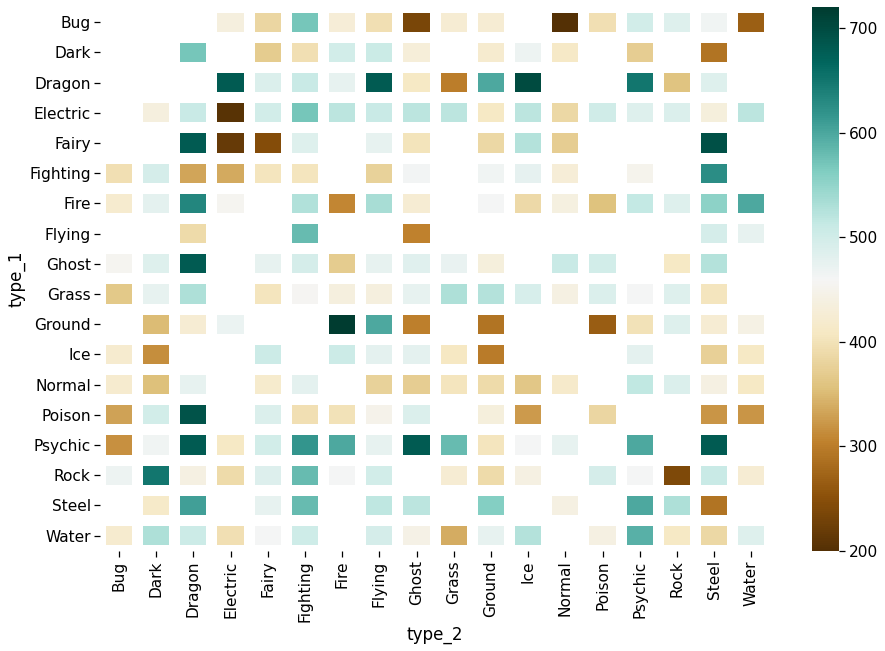

In [181]:
joined = pd.merge(
pokedex,statistics,
on='pokedex_number'
)
medians = joined.groupby(['type_1', 'type_2']).median().loc[:, 'total_points']
dims = (15, 10) #A4 dimensions
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(
medians.unstack(),
linewidths=10, 
cmap='BrBG'
);

**Q6. What is the relationship between attack and defense of the Pokemons?**

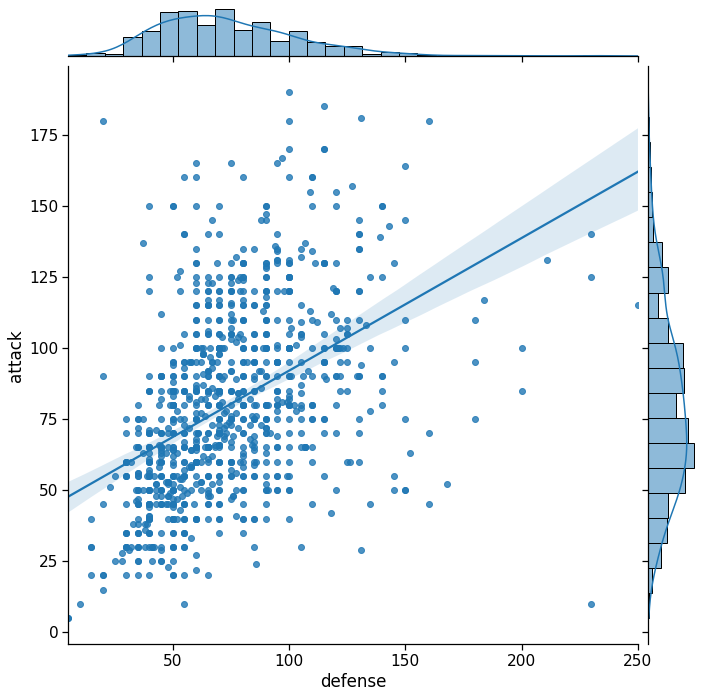

In [148]:
jntplt = sns.jointplot(x = 'defense', y = 'attack', data = useful_data, kind = 'reg', height = 10, ratio = 10)

**Q7. What are the Total points of the pokemon according to legendary status?**

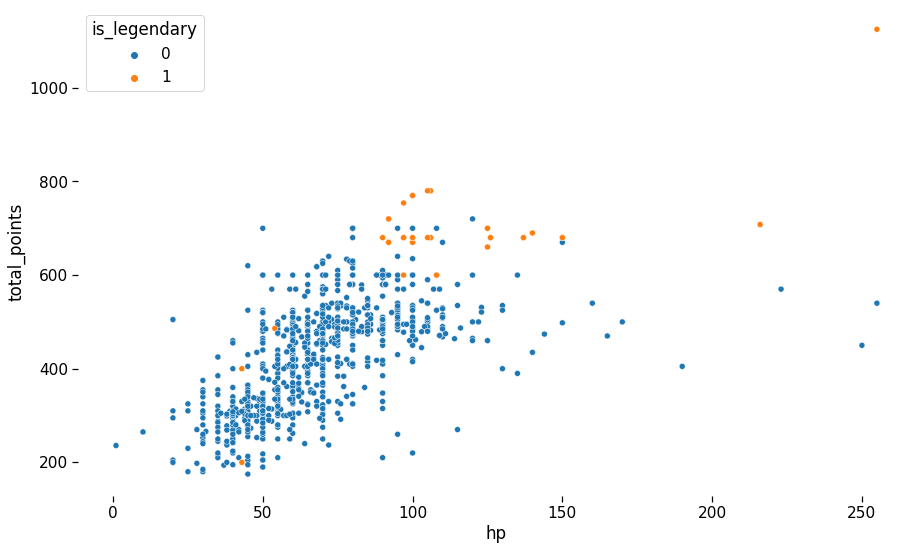

In [150]:
setplt()
scatplt = sns.scatterplot(x = 'hp', y = 'total_points', hue = 'is_legendary', data = useful_data)

**Q8. What are the Total points of the pokemon according to their  status ?**

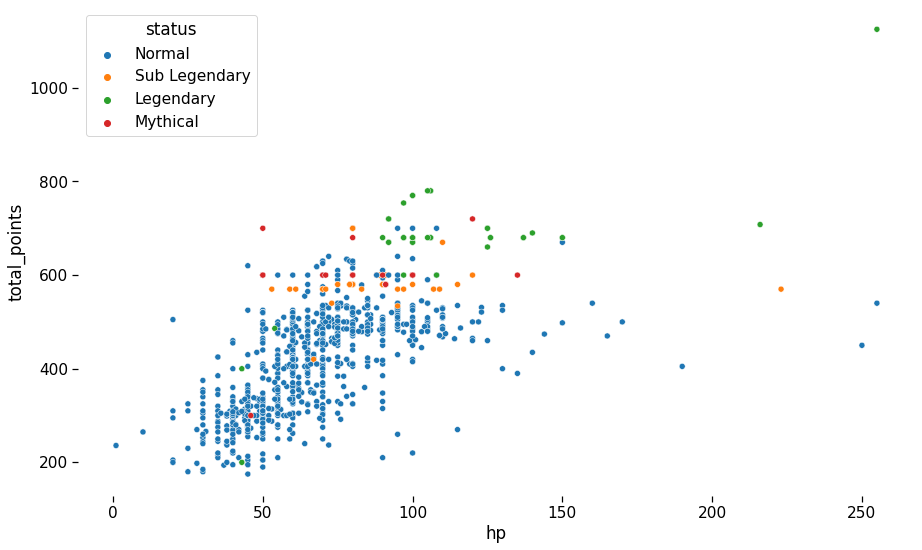

In [149]:
setplt()
scatplt = sns.scatterplot(x = 'hp', y = 'total_points', hue = 'status', data = useful_data)

**Q9. What is the distribution of Total_Points?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


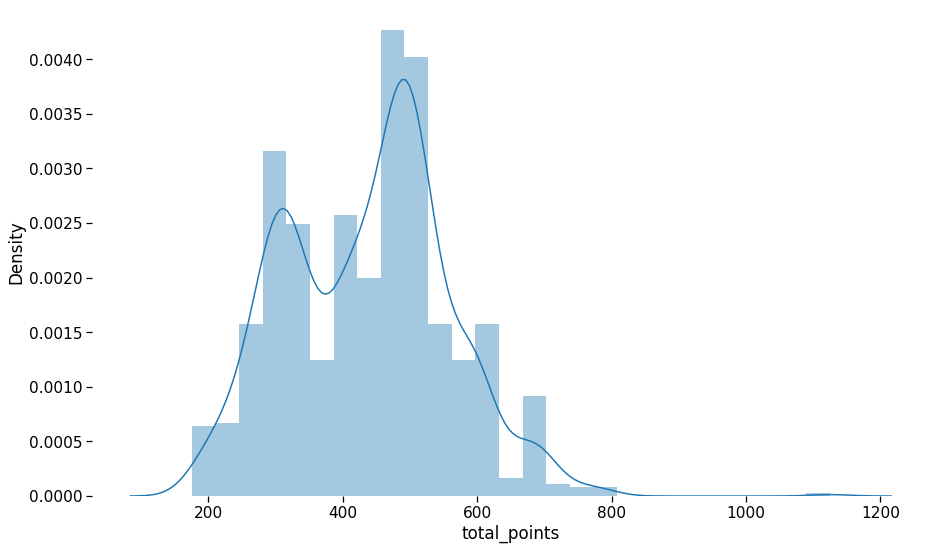

In [151]:
setplt()
distplt = sns.distplot(useful_data['total_points'])

In [152]:
legendary = useful_data[useful_data['is_legendary'] == True]
legendary.head()

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,type_number,type_1,type_2,total_points,hp,attack,defense,sp_attack,sp_defense,speed,growth_rate,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,status
188,150,Mewtwo,1,0,1,0,1,Psychic,Flying,680.0,106.0,110.0,90.0,154.0,90.0,130.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,0.50,1.0,1.0,1.0,0.5,2.00,1.0,2.0,1.0,2.0,1.0,1.0,Legendary
189,150,Mega Mewtwo X,1,0,1,0,2,Psychic,Fighting,780.0,106.0,190.0,100.0,154.0,100.0,130.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,0.50,1.0,1.0,2.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,2.0,Legendary
190,150,Mega Mewtwo Y,1,0,1,0,1,Psychic,Fighting,780.0,106.0,150.0,70.0,194.0,120.0,140.0,Slow,1.0,1.0,1.0,1.0,1.00,1.0,0.50,1.0,1.0,1.0,0.5,2.00,1.0,2.0,1.0,2.0,1.0,1.0,Legendary
294,249,Lugia,2,0,1,0,2,Psychic,Flying,680.0,106.0,90.0,130.0,90.0,154.0,110.0,Slow,1.0,1.0,1.0,2.0,0.50,2.0,0.25,1.0,0.0,1.0,0.5,1.00,2.0,2.0,1.0,2.0,1.0,1.0,Legendary
295,250,Ho-oh,2,0,1,0,2,Fire,Flying,680.0,106.0,130.0,90.0,110.0,154.0,90.0,Slow,1.0,0.5,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,Legendary


In [153]:
print("Attack:")
print("\nLegendary")
print(legendary['attack'].mean())
print("\nNormal")
print(useful_data['attack'].mean())
print("\nDefense:")
print("\nLegendary")
print(legendary['defense' ].mean())
print("\nNormal")
print(useful_data['defense'].mean())

Attack:

Legendary
125.74358974358974

Normal
80.11988304093568

Defense:

Legendary
108.2051282051282

Normal
74.50194931773879


In [154]:
print(len(useful_data))
print(len(useful_data[useful_data["is_legendary"] == True]))

1026
39


**Q10. What is the distribution of Legendary Pokemons and their Powers**

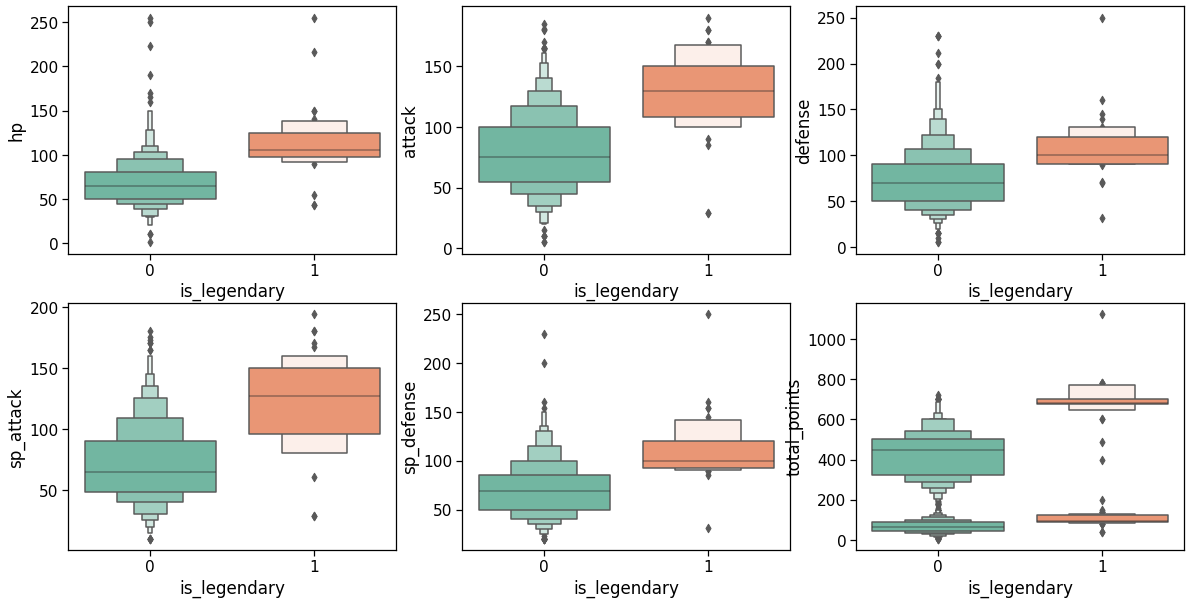

In [182]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
# Plotting 
v_plot = sns.boxenplot(x = 'is_legendary', y = "hp", data = useful_data, palette = "Set2", ax = ax[0][0])
v_plot = sns.boxenplot(x = 'is_legendary', y = "attack", data = useful_data, palette = "Set2", ax = ax[0][1])
v_plot = sns.boxenplot(x = 'is_legendary', y = "defense", data = useful_data, palette = "Set2", ax = ax[0][2])
v_plot = sns.boxenplot(x = 'is_legendary', y = "sp_attack", data = useful_data, palette = "Set2", ax = ax[1][0])
v_plot = sns.boxenplot(x = 'is_legendary', y = "sp_defense", data = useful_data, palette = "Set2", ax = ax[1][1])
v_plot = sns.boxenplot(x = 'is_legendary', y = "speed", data = useful_data, palette = "Set2", ax = ax[1][2])
v_plot = sns.boxenplot(x = 'is_legendary', y = "total_points", data = useful_data, palette = "Set2", ax = ax[1][2])

**Preparing the Data**

In [156]:
X = useful_data[['hp','attack','defense','sp_attack','sp_defense','speed','total_points']]
y = useful_data[['is_legendary']]

In [157]:
A = useful_data[['against_normal','against_fire','against_water','against_electric','against_grass','against_ice','against_fight','against_poison','against_ground','against_flying','against_psychic','against_bug','against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']]
b = useful_data[['is_legendary']]

We split our data into training and testing sets.

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values) 

**Training the Algorithm**

In [159]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Making Predictions**

In [160]:
y_pred = classifier.predict(X_test)

**Evaluate the Algorithm**

Print Confusion Matrix and Classification Report

In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[245   1]
 [  2   9]]


In [162]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       246
           1       0.90      0.82      0.86        11

    accuracy                           0.99       257
   macro avg       0.95      0.91      0.93       257
weighted avg       0.99      0.99      0.99       257



In [163]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.9883268482490273


In [164]:
classifier.score(X_test, y_test)

0.9883268482490273

In [185]:
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(bootstrap = True, max_depth = 3)
cross_val_score(classifier, X, y, cv = 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

array([1.        , 0.99029126, 0.99029126, 0.99029126, 0.98058252,
       0.95145631, 0.98039216, 0.98039216, 0.98039216, 0.98039216])

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values) 

dt = DecisionTreeClassifier(max_depth=8)

dt.fit(X_train,y_train)'''

In [ ]:
'''dt.score(X_test,y_test)'''